### Feature Engineering

- Feature engineering involves transforming dataset features to reveal patterns, enhance insights, and improve model accuracy.










### Import Libraries

In [1]:
# Import necessary libraries and suppress warnings
import warnings
warnings.simplefilter(action='ignore')

import pandas as pd
import numpy as np
import random

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(style="whitegrid")


import pandas as pd
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import chi2, SelectKBest
from sklearn.ensemble import RandomForestClassifier

from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
from sklearn.model_selection import train_test_split


#### Load datasets

In [2]:
df_red = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv", delimiter=";")
df_white = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv", delimiter=";")
df = pd.read_csv("https://raw.githubusercontent.com/npradaschnor/Pima-Indians-Diabetes-Dataset/master/diabetes.csv")

# Display the first few rows to verify data loading
print("Red Wine Dataset (first 5 rows):")
display(df_red.head(2))

print("White Wine Dataset (first 5 rows):")
display(df_white.head(2))
# Display raws in pima-Indians-Diabetes-Dataset
display(df.head(2))


Red Wine Dataset (first 5 rows):


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.0,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5


White Wine Dataset (first 5 rows):


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.001,3.0,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.994,3.3,0.49,9.5,6


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0


- You can introduce null values (NaNs) into a dataset

In [3]:
# specific columns to introduce NaN values
selected_columns = ['citric acid', 'pH']

# Introduce NaN values randomly in selected columns
np.random.seed(42)
for col in selected_columns:
    mask = np.random.rand(df_white.shape[0]) < 0.01
    df_white.loc[mask, col] = np.nan

### Feature engineering techniques in Python
- Handling missing data

In [4]:
df_white.isnull().sum()

fixed acidity            0
volatile acidity         0
citric acid             43
residual sugar           0
chlorides                0
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                      49
sulphates                0
alcohol                  0
quality                  0
dtype: int64

- Mean/Median/Mode imputation:
    
    This is taking the mean, median, or mode of all other values in the feature and inputting the derived value into empty or missing columns.


### 1.  Mean/Median/Mode imputation

In [9]:
# Mean imputation
df_mean = df_white.copy()
df_mean.fillna(df_mean.mean(), inplace=True)

# Median imputation
df_median = df_white.copy()
df_median.fillna(df_median.median(), inplace=True)

# Mode imputation
df_mode = df_white.copy()
df_mode.fillna(df_mode.mode().iloc[0], inplace=True)

# display("Original DataFrame:", df_white.head(2))
# display("Mean Imputation:", df_mean.head(2))
# display("Median Imputation:", df_median.head(2))
# display("Mode Imputation:", df_mode.head(2))

display(df.median())

Pregnancies                   3.0000
Glucose                     117.0000
BloodPressure                72.0000
SkinThickness                23.0000
Insulin                      30.5000
BMI                          32.0000
DiabetesPedigreeFunction      0.3725
Age                          29.0000
Outcome                       0.0000
dtype: float64

### 2. Forward and Backward fill

In [7]:
# Forward Fill
df_ffill = df_white.copy()
df_ffill.fillna(method='ffill', inplace=True)

# Backward Fill
df_bfill = df_white.copy()
df_bfill.fillna(method='bfill', inplace=True)

display("Original DataFrame:", df_white.head(2))
display("Forward Fill:", df_ffill.head(2))
display("Backward Fill:", df_bfill.head(2))

'Original DataFrame:'

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.001,3.0,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.994,3.3,0.49,9.5,6


'Forward Fill:'

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.001,3.0,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.994,3.3,0.49,9.5,6


'Backward Fill:'

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.001,3.0,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.994,3.3,0.49,9.5,6


### Feature scaling
 - Min-Max Scaling
 - Standardization

In [8]:
df_scaling = df_white.copy()

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Apply Min-Max Scaling
df_scaled = pd.DataFrame(scaler.fit_transform(df_scaling), columns=df_scaling.columns)

print("Original DataFrame:\n")# df_white)
display(df_white.head(2))
print("\nMin-Max Scaled DataFrame:\n")#, df_scaled)
display(df_scaled.head(2))

Original DataFrame:



,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.001,3.0,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.994,3.3,0.49,9.5,6



Min-Max Scaled DataFrame:



,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0.307692,0.186275,0.216867,0.308282,0.106825,0.149826,0.373550,0.267785,0.254545,0.267442,0.129032,0.5
1,0.240385,0.215686,0.204819,0.015337,0.118694,0.041812,0.285383,0.132832,0.527273,0.313953,0.241935,0.5


In [9]:
df_standardized = df_white.copy()

# Initialize StandardScaler
scaler = StandardScaler()

# Apply Standardization
df_standardized = pd.DataFrame(scaler.fit_transform(df_standardized), columns=df_standardized.columns)

print("Original DataFrame:\n")
display(df_white.head(2))
print("\nStandardized DataFrame:\n") #, df_standardized)
display(df_standardized.head(2))


Original DataFrame:



,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.001,3.0,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.994,3.3,0.49,9.5,6



Standardized DataFrame:



,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0.172097,-0.081770,0.211215,2.821349,-0.035355,0.569932,0.744565,2.331512,-1.246726,-0.349184,-1.393152,0.13787
1,-0.657501,0.215896,0.045940,-0.944765,0.147747,-1.253019,-0.149685,-0.009154,0.740446,0.001342,-0.824276,0.13787


### Feature selection


1. Filter Methods (correlation coefficients, chi-square tests, and mutual information)
2. Wrapper Methods (recursive feature elimination (RFE) and forward/backward feature selection)
3. Feature Importance from Tree-based Models

- Correlation

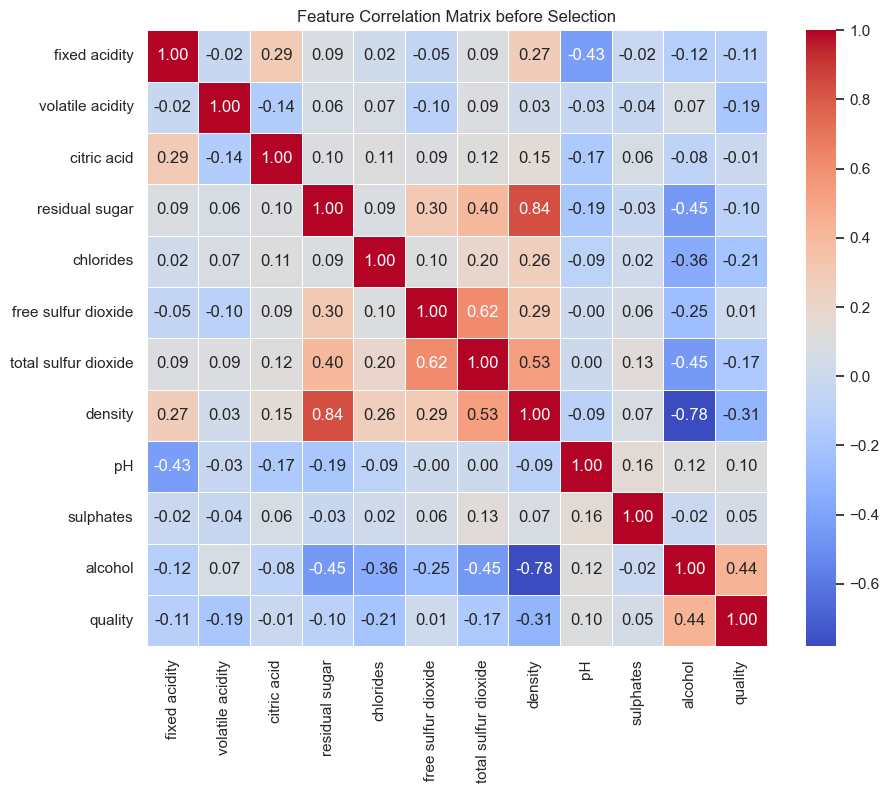

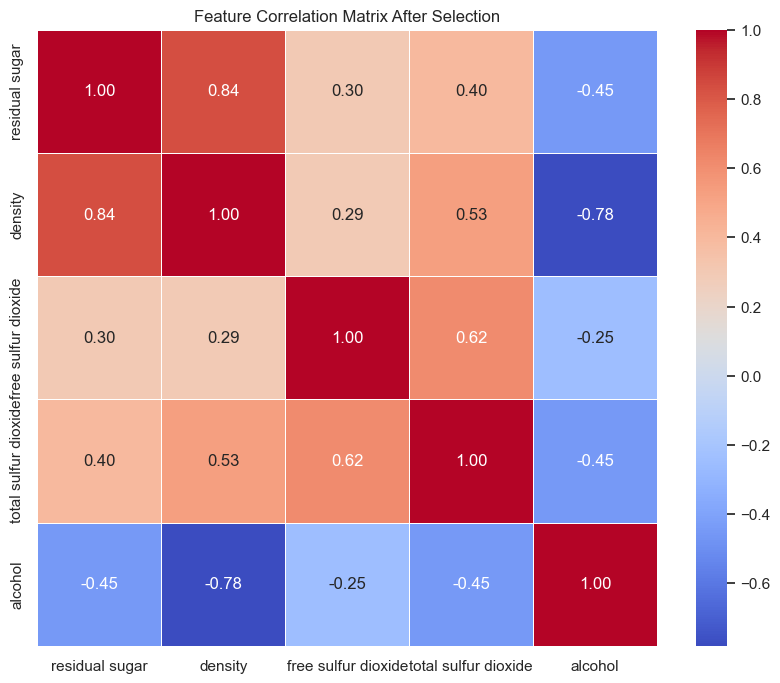

selected features:


,residual sugar,density,free sulfur dioxide,total sulfur dioxide,alcohol
0,20.7,1.0010,45.0,170.0,8.8
1,1.6,0.9940,14.0,132.0,9.5
2,6.9,0.9951,30.0,97.0,10.1
3,8.5,0.9956,47.0,186.0,9.9
4,8.5,0.9956,47.0,186.0,9.9


In [11]:


def correlation_feature_selection(df, threshold=0.6):

    # Compute correlation matrix
    corr_matrix = df.corr()#.abs()

    # Create mask for upper triangle to avoid duplicate checks
    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    lower = corr_matrix.where(np.tril(np.ones(corr_matrix.shape), k=-1).astype(bool))

    # Identify columns to drop
    to_keep_upper = [column for column in upper.columns if any(upper[column].abs() > threshold)]
    to_keep_lower = [column for column in lower.columns if any(lower[column].abs() > threshold)]

    myset = set(to_keep_upper)
    myset.update(to_keep_lower)
    
    keep_col = list(myset)
    # Drop correlated features
    return df[keep_col]

# Copy the original DataFrame
df_select = df_white.copy()

plt.figure(figsize=(10, 8))
sns.heatmap(df_select.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Feature Correlation Matrix before Selection")
plt.show()


# Apply correlation feature selection
df_selected = correlation_feature_selection(df_select, threshold=0.6)

# Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(df_selected.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Feature Correlation Matrix After Selection")
plt.show()

# Display remaining features as a table
print("selected features:")
display(df_selected.head()) #.describe())#.T)


- chi_square_feature_selection

Selected features:


,volatile acidity,residual sugar,free sulfur dioxide,total sulfur dioxide,alcohol
0,0.27,20.7,45.0,170.0,8.8
1,0.30,1.6,14.0,132.0,9.5
2,0.28,6.9,30.0,97.0,10.1
3,0.23,8.5,47.0,186.0,9.9
4,0.23,8.5,47.0,186.0,9.9


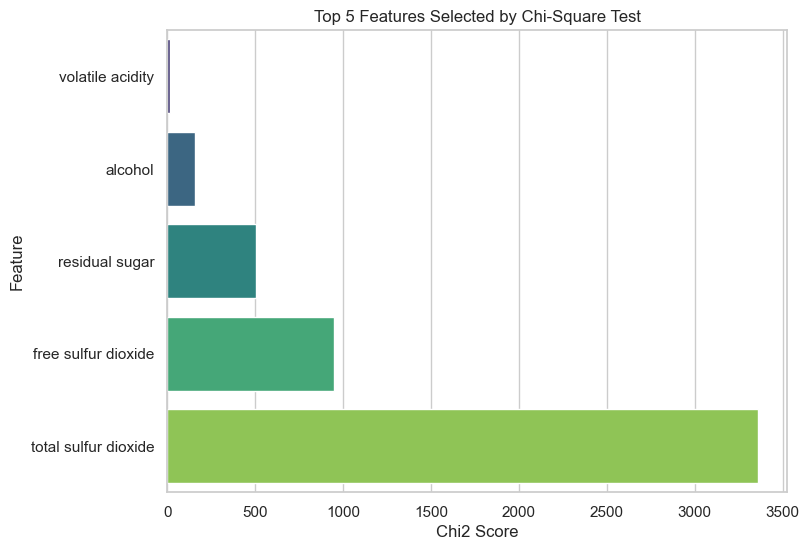

In [14]:

def chi_square_feature_selection(X, y, k=5):

    chi2_selector = SelectKBest(chi2, k=k)
    X_new = chi2_selector.fit_transform(X, y)
    selected_features = X.columns[chi2_selector.get_support()]
    scores = chi2_selector.scores_[chi2_selector.get_support()]
    feature_scores = pd.DataFrame({'Feature': selected_features, 'Chi2 Score': scores})
    feature_scores = feature_scores.sort_values(by='Chi2 Score', ascending=True)
    return X[selected_features], feature_scores

# dataset with out NULL records
df_select_chi= df_bfill.copy()

# Assuming 'quality' is the dependent variable in our data set
y = df_select_chi['quality']
X = df_select_chi.drop(columns=['quality'])

# Apply Chi-Square feature selection to select the best 5 features
df_selected, feature_scores = chi_square_feature_selection(X, y, k=5)

# Display remaining features as a table
print("Selected features:")
display(df_selected.head())

# Bar plot of selected features sorted by Chi2 score
plt.figure(figsize=(8, 6))
sns.barplot(x='Chi2 Score', y='Feature', data=feature_scores, palette='viridis')
plt.xlabel("Chi2 Score")
plt.ylabel("Feature")
plt.title("Top 5 Features Selected by Chi-Square Test")
plt.show()




- Recursive feature elimination (RFE)  

In [ ]:
# Assuming 'quality' is your target variable and we handled missing values
df_rfe = df_bfill.copy()
y = df_rfe['quality']
X = df_rfe.drop(columns=['quality'])

# Initialize the Logistic Regression model, but you can use other models as well
model = LogisticRegression()

# Initialize RFE with the model and the desired number of features
rfe = RFE(estimator=model, n_features_to_select=5) # Select top 5 features

# Fit RFE to the data
rfe.fit(X, y)

# Get the selected features
selected_features = X.columns[rfe.support_]

# Get the ranking of all features
feature_ranking = pd.DataFrame({'Feature': X.columns, 'Ranking': rfe.ranking_})

# Print the selected features
print("Selected Features:")
print(selected_features)

# Display feature rankings
print("\nFeature Ranking:")
print(feature_ranking)

# Create a new DataFrame with only the selected features
df_selected_rfe = df_rfe[selected_features]

# Example: Display the first few rows of the new DataFrame
print("\nDataFrame with Selected Features:")
display(df_selected_rfe.head())


Selected Features:
Index(['fixed acidity', 'residual sugar', 'free sulfur dioxide', 'pH',
       'alcohol'],
      dtype='object')

Feature Ranking:
                 Feature  Ranking
0          fixed acidity        1
1       volatile acidity        3
2            citric acid        5
3         residual sugar        1
4              chlorides        7
5    free sulfur dioxide        1
6   total sulfur dioxide        2
7                density        4
8                     pH        1
9              sulphates        6
10               alcohol        1

DataFrame with Selected Features:


,fixed acidity,residual sugar,free sulfur dioxide,pH,alcohol
0,7.0,20.7,45.0,3.00,8.8
1,6.3,1.6,14.0,3.30,9.5
2,8.1,6.9,30.0,3.19,10.1
3,7.2,8.5,47.0,3.19,9.9
4,7.2,8.5,47.0,3.19,9.9


- Feature importance from tree-based models.


Feature Importances:


,Feature,Importance
10,alcohol,0.116372
7,density,0.102254
1,volatile acidity,0.100148
5,free sulfur dioxide,0.093843
6,total sulfur dioxide,0.090848
3,residual sugar,0.087975
8,pH,0.085814
4,chlorides,0.083945
9,sulphates,0.082221
2,citric acid,0.080688


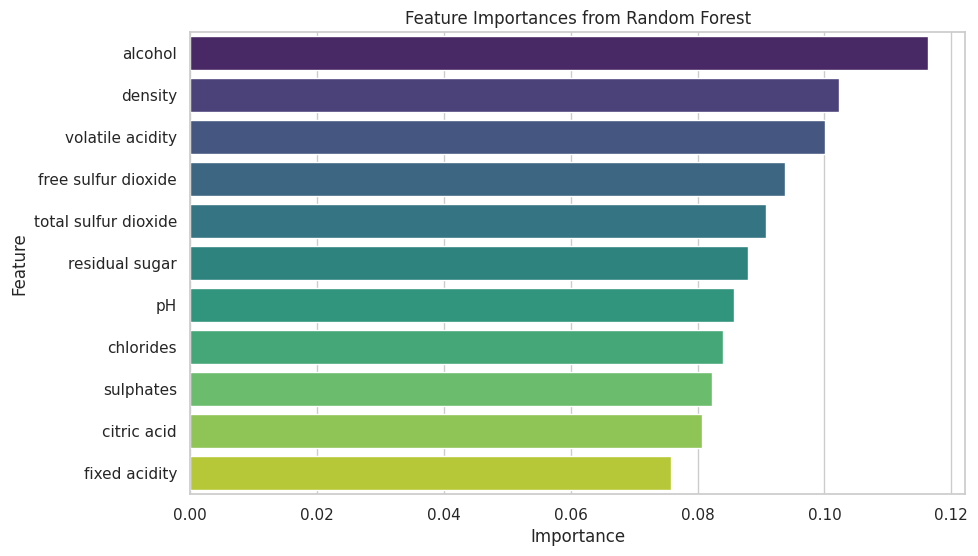

In [ ]:
# Suppse 'quality' is your target variable
df_tree = df_bfill.copy()
y = df_tree['quality']
X = df_tree.drop(columns=['quality'])

# Initialize a RandomForestClassifier here, but you can use another tree-based model
model = RandomForestClassifier()

# Fit the model to your data
model.fit(X, y)
importances = model.feature_importances_

# Create a DataFrame to display feature importances
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': importances})

# Sort the DataFrame by importance
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Display the feature importances
print("\nFeature Importances:")
display(feature_importances)

# You can also plot the feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances, palette='viridis')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances using Random Forest')
plt.show()


### Dealing with imbalanced datasets (diabetes)
- Apply Synthetic Minority Over-Sampling Technique (SMOTE)

In [ ]:
# diabetes dataset (which has imbalanced data)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


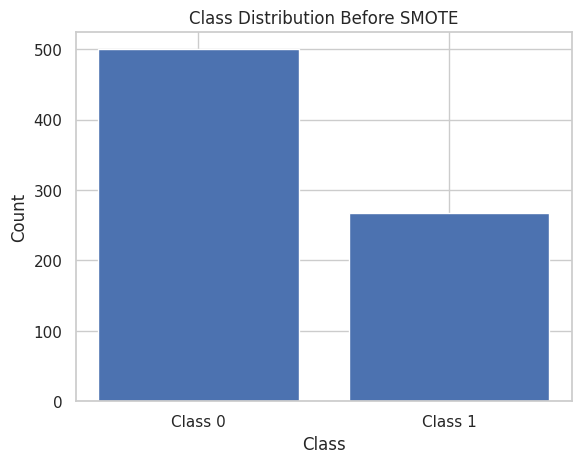

In [ ]:

x=df.drop(["Outcome"],axis=1)
y=df["Outcome"]
count_class = y.value_counts() # Count the occurrences of each class
plt.bar(count_class.index, count_class.values)
plt.xlabel('Class')
plt.ylabel('Count')
plt.title("Class Distribution Before SMOTE")
plt.xticks(count_class.index, ['Class 0', 'Class 1'])
plt.show()


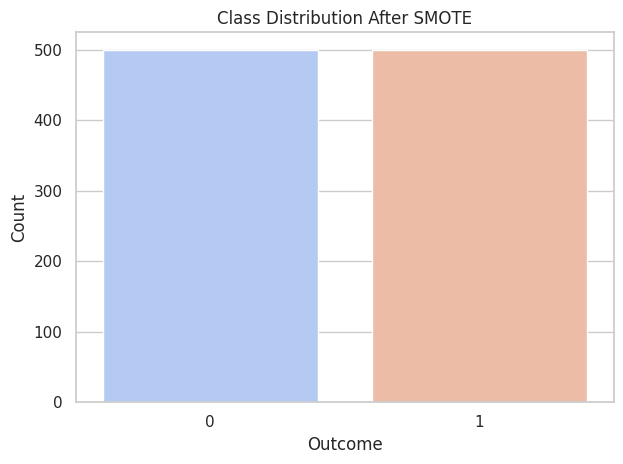

Class distribution before SMOTE:
 Outcome
0    500
1    268
Name: count, dtype: int64

Class distribution after SMOTE:
 Outcome
1    500
0    500
Name: count, dtype: int64


In [ ]:

# Apply SMOTE
smote = SMOTE(sampling_strategy='minority', random_state=42)
X_resampled, y_resampled = smote.fit_resample(x, y)

# Check class distribution after SMOTE
sns.countplot(x=y_resampled, palette="coolwarm")
plt.title("Class Distribution After SMOTE")
plt.xlabel("Outcome")
plt.ylabel("Count")

plt.tight_layout()
plt.show()

# Print the updated class counts
print("Class distribution before SMOTE:\n", y.value_counts())
print("\nClass distribution after SMOTE:\n", y_resampled.value_counts())


- Train a Classifier (RandomForest) on the Imbalanced Dataset

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report


X_train, X_test, y_train, y_test = train_test_split(
    x, y, test_size=0.3, random_state=42, stratify=y)
# Train a Random Forest classifier on the imbalanced dataset
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)
# Predict on the test set
y_pred = clf.predict(X_test)
# Evaluate the model
print("Classification Report (Before SMOTE):")
print(classification_report(y_test, y_pred))

Classification Report (Before SMOTE):
              precision    recall  f1-score   support

           0       0.77      0.87      0.82       150
           1       0.68      0.53      0.60        81

    accuracy                           0.75       231
   macro avg       0.73      0.70      0.71       231
weighted avg       0.74      0.75      0.74       231



- Train the Classifier (RandomForest) on the balanced (SMOTE) Dataset  

In [ ]:
# Train the classifier on the SMOTE-balanced dataset
clf_smote = RandomForestClassifier(random_state=48)
clf_smote.fit(X_resampled, y_resampled)
# Predict on the test set
y_pred_smote = clf_smote.predict(X_test)
# Evaluate the model
print("Classification Report (After SMOTE):")
print(classification_report(y_test, y_pred_smote))

Classification Report (After SMOTE):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       150
           1       1.00      1.00      1.00        81

    accuracy                           1.00       231
   macro avg       1.00      1.00      1.00       231
weighted avg       1.00      1.00      1.00       231

